## Introduction

In this assignment, we will use the csv file **tips.csv**. 
- Read it into a data frame, call it `data`. (Import the packages you think you need).

In [9]:
# Your Code Here
import pandas as pd
data = pd.read_csv('tips.csv')
data

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,age
0,0,16.99,1.01,Female,No,Sun,Dinner,2,24
1,1,10.34,1.66,Male,No,Sun,Dinner,3,16
2,2,21.01,3.50,Male,No,Sun,Dinner,3,24
3,3,23.68,3.31,Male,No,Sun,Dinner,2,22
4,4,24.59,3.61,Female,No,Sun,Dinner,4,24
...,...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3,22
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2,24
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2,22
242,242,17.82,1.75,Male,No,Sat,Dinner,2,22


## Question-1

- Select a copy of the original data frame that contains `age` and `total_bill` only.
- Normalize the data then remove all outliers.
- Using K-means algorithm find the best grouping (clusters) of these records and explain about your findings

In [52]:
# Your Code Here
df = data[['age', 'total_bill']].copy()
df

,age,total_bill
0,24,16.99
1,16,10.34
2,24,21.01
3,22,23.68
4,24,24.59
...,...,...
239,22,29.03
240,24,27.18
241,22,22.67
242,22,17.82


In [53]:
# Your Code Here
from scipy import stats
import numpy as np
import sklearn.preprocessing as skp
df['total_bill']=skp.MinMaxScaler().fit_transform(df['total_bill'].values.reshape(-1,1))
df['age'] = skp.MinMaxScaler().fit_transform(df['age'].values.reshape(-1,1))
df = df[np.abs(stats.zscore(df)<3).all(axis=1)]
df
                                                  

,age,total_bill
0,0.166667,0.291579
1,0.018519,0.152283
2,0.166667,0.375786
3,0.129630,0.431713
4,0.166667,0.450775
...,...,...
239,0.129630,0.543779
240,0.166667,0.505027
241,0.129630,0.410557
242,0.129630,0.308965


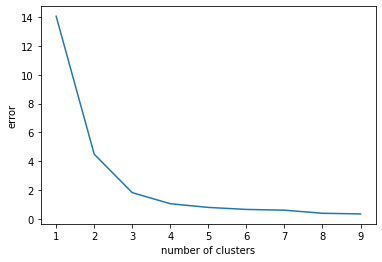

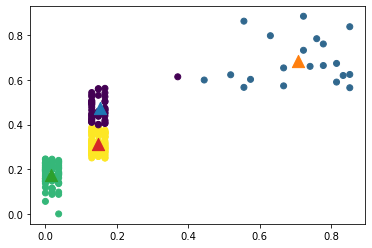

In [57]:
# Your Code Here
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
errors=[]
for n in range(1,10):
    my_kmeans=KMeans(n,init='k-means++',n_init='auto')
    my_kmeans.fit(df)
    errors.append(my_kmeans.inertia_)
plt.plot(range(1,10), errors)
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()
my_kmeans=KMeans(4,init='k-means++',n_init='auto')
my_kmeans.fit(df)
# I use elbow method here and plot the graph, when there are 4 clusters, there is a elbow on the graph.
plt.scatter(df['age'], df['total_bill'], c=my_kmeans.labels_)
plt.scatter(my_kmeans.cluster_centers_[0,0],my_kmeans.cluster_centers_[0,1],s=150, marker='^')
plt.scatter(my_kmeans.cluster_centers_[1,0],my_kmeans.cluster_centers_[1,1],s=150, marker='^')
plt.scatter(my_kmeans.cluster_centers_[2,0],my_kmeans.cluster_centers_[2,1],s=150, marker='^')
plt.scatter(my_kmeans.cluster_centers_[3,0],my_kmeans.cluster_centers_[3,1],s=150, marker='^')

## Question-2

In this question, We want to build a classifier that can predict if the customer is a `smoker` or not based on the the customer `age` and `total_bill`

- Select only related data, then remove all outliers.
- Split this data into training and testing data.
- Build your model using KNN algorithm, consider:
    $$ k=round(\sqrt{nt}) $$ 
    where nt: is the number of instances in training data
- Use the test data to to test your final  model, print its accuracy.
- Use the created model to guess if a customer who paid `total_bill=$40` with `age=60` was smoker or not.

In [63]:
# Your Code Here
df = data[['age', 'total_bill', 'smoker']].copy()
df = df[(np.abs(df.age-df.age.mean()) <= (3*df.age.std())) & 
        (np.abs(df.total_bill-df.total_bill.mean()) <= (3*df.total_bill.std()))]
df

,age,total_bill,smoker
0,24,16.99,No
1,16,10.34,No
2,24,21.01,No
3,22,23.68,No
4,24,24.59,No
...,...,...,...
239,22,29.03,No
240,24,27.18,Yes
241,22,22.67,Yes
242,22,17.82,No


In [68]:
# Your Code Here
from sklearn.model_selection import train_test_split
X=df[['age', 'total_bill']]
Y=df['smoker']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
# Your Code Here
from sklearn.preprocessing import StandardScaler
n_t = len(X_train)
k = int(round(np.sqrt(n_t)))
from sklearn.neighbors import KNeighborsClassifier
my_classifier= KNeighborsClassifier(n_neighbors=k)
my_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=14)

In [70]:
# Your Code Here
y_hat=my_classifier.predict(X_test)
import sklearn.metrics as m
m.f1_score(Y_test, y_hat, average=None)[0]

0.8169014084507042

In [71]:
# Your Code Here
my_data = scaler.transform([[40,60]])
my_classifier.predict(my_data)[0]

/Users/diaoxinqing/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Yes'